In [2]:
import pandas as pd
import json

# Define the file path (change 'your_file.jsonl' to your actual filename)
file_path = "Appliances.jsonl"

# Read the JSONL file line by line and load it into a list
data = []
with open(file_path, "r", encoding="utf-8") as file:
    for i, line in enumerate(file, 1):
        try:
            data.append(json.loads(line.strip()))  # Strip spaces and newlines
        except json.JSONDecodeError:
            print(f"Skipping malformed line {i}: {line}")  # Skip bad lines

import pandas as pd
df = pd.DataFrame(data)



In [3]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1519317108692,0,True
1,5.0,excellent product,Little on the thin side,[],B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,1664746863446,0,True
2,5.0,Happy customer!,"Quick delivery, fixed the issue!",[],B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,1607225435363,0,True
3,5.0,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,1534104184306,0,True
4,5.0,Dryer parts,Easy to install got the product expected to re...,[],B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,1620176603754,0,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128605 entries, 0 to 2128604
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title              object 
 2   text               object 
 3   images             object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 148.2+ MB


In [5]:
df.isna().sum()

,0
rating,0
title,0
text,0
images,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [6]:
df['asin'].value_counts()

,count
asin,
B01DLEL4EM,8848
B000AST3AK,7030
B00LGEKOMS,6984
B01KJ2FVFW,6140
B00UXG4WR8,5896
...,...
B009DUK51C,1
B0BR5GKL4F,1
B017KJ9FFO,1


In [7]:
df = df[['asin','user_id','rating']]

In [8]:
df.head()

,asin,user_id,rating
0,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,5.0
1,B07DD2DMXB,AHWWLSPCJMALVHDDVSUGICL6RUCA,5.0
2,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,5.0
3,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,5.0
4,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,5.0


In [9]:
df['rating'].describe()

,rating
count,2.128605e+06
mean,4.221502e+00
std,1.380826e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


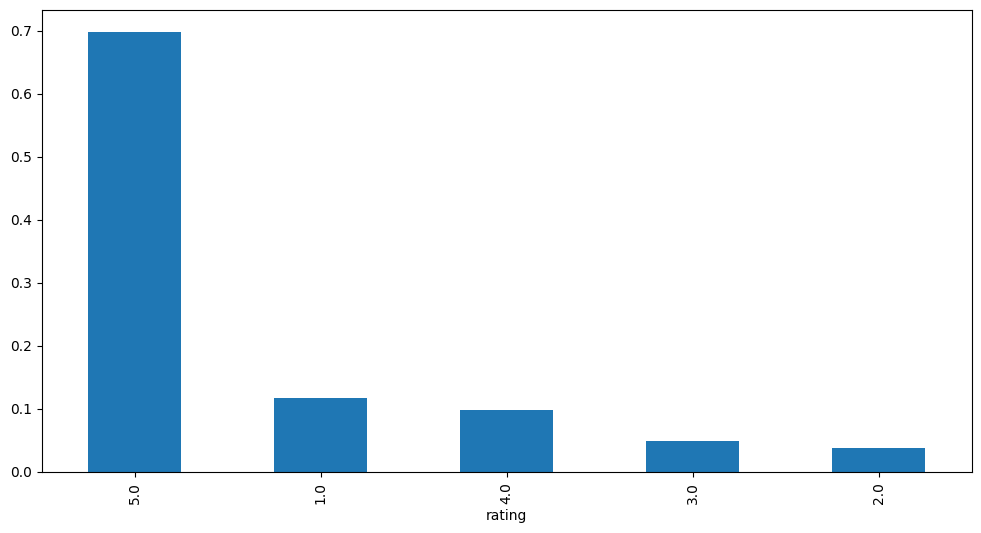

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

In [11]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['asin'].nunique())

Number of unique USERS in Raw data =  1755732
Number of unique ITEMS in Raw data =  104237


In [12]:
# Top 10 users based on rating
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

,0
user_id,
AHJGIPM2BSL2PQIP2223Y2WVVAPQ,111
AF5NXJDWHE77HSJ4LERATTFVS2LA,66
AHKNU4DNSSZYUFUOBEUBGLF7I7EA,66
AHEYN6GU45YH2SZCFXVVNWAPOJIQ,57
AEUSUUHXIIA5R4Q3WJB53GKACOVQ,50
AGBUVBEWICTFWY26GY6PJ6EWRCUQ,48
AEOV4JIKICCCT52K5NT3V32A6Y3Q,48
AGLKQFJXDPM6U6S7GMQKOYAHHVIA,46
AFQMMW3VP54Q3H7UTYY2UQ4EL7RA,45


### 📌 Data Filtering: Retaining Active Users  
To reduce sparsity and improve dataset usability, we will **filter the dataset** by keeping only users who have provided **at least 50 ratings**.

In [13]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 5].index)]

In [14]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['asin'].nunique())

The number of observations in the final data = 63609
Number of unique USERS in the final data =  9918
Number of unique PRODUCTS in the final data =  21888


### 📌 Filtered Dataset for Recommendation System  
The `df_final` DataFrame includes **users who have rated at least 5 items**.  
This refined dataset will be used to **build and train recommendation systems**.


In [15]:
import numpy as np
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
df_final = df_final.groupby(['user_id', 'asin'], as_index=False).agg({'rating': 'mean'})

# Now create the pivot table
final_ratings_matrix = df_final.pivot(index='user_id', columns='asin', values='rating').fillna(0)

print('Shape of final_ratings_matrix:', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix: (9918, 21888)
given_num_of_ratings =  60309
possible_num_of_ratings =  217085184
density: 0.03%


asin,B00002N7HY,B00004YWK2,B00004YWK7,B000056J8D,B00005QTXI,B00005QTXK,B00005QTXO,B000063D2P,B00006IUTN,B00006IUV3,...,B0BYZ47MFL,B0BZ7XJDG9,B0C15QVS6Q,B0C2V7J7XL,B0C4RDSZDW,B0C5863H3L,B0C5D2FH28,B0C5M1D5KF,B0C7P8WLS6,B0CFLJHXYQ
user_id,,,,,,,,,,,,,,,,,,,,,
AE222KSFP7UXSULU6I34OU2A2DUQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE22E3XNIF5TITEAJXHT55LD5QUQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE23C4L3EODTQLTZ5EAXDAABJA4Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE23D7HHJAMENM7IKA4IOIHNS7OA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE23LGJAR6Y5RBHKK57VZIN327XA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 📌 Rank-Based Recommendation System  

A **Rank-Based Recommendation System** suggests items by **ranking them based on popularity metrics** such as **average ratings, total ratings, or weighted scores**. This approach is **simple, scalable, and effective for general recommendations**.

### 🔹 How It Works:
1. **Aggregate item ratings** (e.g., total ratings, average rating per item).
2. **Rank items** based on popularity scores.
3. **Recommend the top-ranked items** to users.

### 🔹 Advantages:
✔ Works well **without user-specific data**.  
✔ Scalable and easy to implement.  
✔ Provides **trending/popular item recommendations**.

### 🔹 Limitations:
❌ **Lacks personalization**—recommends the same items to all users.  
❌ **Ignores user preferences and diversity**.  

### 🔹 Example Ranking Strategy:
- **Sort items by average rating**: Items with higher ratings appear first.  
- **Sort by number of ratings**: Items with more reviews are ranked higher.  
- **Weighted ranking (Bayesian average, IMDB formula)**: Accounts for both average rating and total votes.




In [21]:
# Convert the 'rating' column to numeric, setting errors='coerce' to convert non-numeric values to NaN
df_final['rating'] = pd.to_numeric(df_final['rating'], errors='coerce')

# Drop rows with NaN values in the 'rating' column (optional, depending on your use case)
df_final = df_final.dropna(subset=['rating'])

# Calculate the average rating for each product
average_rating = df_final.groupby('asin')['rating'].mean() # Changed this line

# Calculate the count of ratings for each product
count_rating = df_final.groupby('asin')['rating'].count() # Changed this line

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

# Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating', ascending=False)

# Display the top rows of the final dataframe
print(final_rating.head())

            avg_rating  rating_count
asin                                
B00002N7HY         5.0             2
B07BCC27XM         5.0             2
B07B8K571C         5.0             1
B07B912XJL         5.0             3
B09NJ41W3V         5.0             3


In [22]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

## 📌 Top 5 Product Recommendations Based on Popularity  

Recommending the **top 5 products** that have received **at least 50 user interactions**, ranked by popularity. This ensures that only well-engaged products are considered for recommendations.  


In [26]:
list(top_n_products(final_rating, 5, 50))

['B072Z98M2S', 'B01DLEL4EM', 'B004XLDEAU', 'B0076OW80S', 'B00CW0O1EW']

Recommending the **top 5 products** that have received **at least 100 user interactions**, ranked by popularity. This ensures that only well-engaged products are considered for recommendations.  

In [27]:
list(top_n_products(final_rating, 5, 100))

['B01DLEL4EM', 'B001ICYB2M', 'B000AST3AK', 'B008O7Z1F0', 'B003N1ZSYG']

## 📌 Collaborative Filtering-Based Recommendation System  

### 🔹 User-Based Collaborative Filtering  
User-based collaborative filtering recommends products by identifying users with **similar preferences** and suggesting items liked by similar users.  

### **How It Works:**
1. **Find similar users** based on past interactions (e.g., ratings, purchases).
2. **Identify items liked by similar users** but not yet interacted with by the target user.
3. **Recommend the most relevant items** based on similarity scores.  

### **Advantages:**
✔ Personalized recommendations based on user behavior.  
✔ No need for product metadata—works purely on user interactions.  

### **Limitations:**
❌ Struggles with new users who have **few interactions** (Cold Start Problem).  
❌ Computationally expensive for large datasets.  

In [28]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

asin,B00002N7HY,B00004YWK2,B00004YWK7,B000056J8D,B00005QTXI,B00005QTXK,B00005QTXO,B000063D2P,B00006IUTN,B00006IUV3,...,B0BYZ47MFL,B0BZ7XJDG9,B0C15QVS6Q,B0C2V7J7XL,B0C4RDSZDW,B0C5863H3L,B0C5D2FH28,B0C5M1D5KF,B0C7P8WLS6,B0CFLJHXYQ
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Defining a Function for similar user and their scores of similarity

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

## 📌 Finding the Top 10 Similar Users for User Index 9543  

Identifying the **top 10 most similar users** to user index **9543** based on **cosine similarity**. The similarity score represents how closely their preferences align, helping in **personalized recommendations**.

In [36]:
similar = similar_users(9543, final_ratings_matrix)[0][0:10]
similar

[6499, 1580, 165, 3479, 2811, 8317, 4948, 1057, 6339, 4255]

In [38]:
similar_users(9543,final_ratings_matrix)[1][0:10]

[array([[0.6062481]]),
 array([[0.54727045]]),
 array([[0.54060905]]),
 array([[0.4950495]]),
 array([[0.48949358]]),
 array([[0.48785712]]),
 array([[0.47653639]]),
 array([[0.47632311]]),
 array([[0.44684446]]),
 array([[0.44499416]])]

## 📌 Function to Recommend Products Based on Similar Users  

This function recommends products to a target user by analyzing **top similar users** and suggesting items they have interacted with but the target user has not.  

In [39]:
def recommendations(user_index, num_of_products, interactions_matrix):

    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]

    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]

## 📌 Recommending 5 Products for User Index 9543 Using Similarity-Based Collaborative Filtering  

This approach recommends **5 personalized products** to user index **9543** by leveraging **user-based collaborative filtering**. The system identifies **similar users**, analyzes their interactions, and suggests products that user **9543** has not yet interacted with.

In [43]:
recommendations(9543,5,final_ratings_matrix)

['B07SG9JFZN', 'B077H7V2FZ', 'B01G50YTKU', 'B01AUBYMK2', 'B004G9L0CI']